# StackOverflow Developer Survey Conclusions

CRISP-DM stands for Cross Industry Process for Data Mining. I will be using this process to explore the survey results for StackOverflow's Developer Survey in 2019. CRISP-DM is a structured approach to planning a data mining project. It includes the following processes:

>1.[Business Understanding](#business_understanding) <br>
>2.[Data Understanding](#data_understanding) <br>
>3.[Prepare Data](#prepare_data) <br>
>4.[Data Modelling](#data_modelling) <br>
>5.[Evaluate the Results](#evaluate_the_results) <br>
>6.[Deploy](#deploy) <br>

<a id='business_understanding'></a>
## Business Understanding 

From this data we can ask some interesting questions. I want to know:
> 1. How common is becoming a data scientist or machine learning specialist with a physics background? <br>
> 2. What programming languages should I focus on to become a data scientist? <br>
> 3. How should I learn the necessary programming languages? <br>


<a id='data_understanding'></a>
## Data Understanding

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/paulzebarth/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [93]:
df_results_2019 = pd.read_csv('survey_results_public_2019.csv')
df_results_2017 = pd.read_csv('survey_results_public_2017.csv')
df_schema = pd.read_csv('survey_results_schema.csv')

In [94]:
for i in range(len(df_results_2019.columns)):
    print(df_results_2019.columns[i])

Respondent
MainBranch
Hobbyist
OpenSourcer
OpenSource
Employment
Country
Student
EdLevel
UndergradMajor
EduOther
OrgSize
DevType
YearsCode
Age1stCode
YearsCodePro
CareerSat
JobSat
MgrIdiot
MgrMoney
MgrWant
JobSeek
LastHireDate
LastInt
FizzBuzz
JobFactors
ResumeUpdate
CurrencySymbol
CurrencyDesc
CompTotal
CompFreq
ConvertedComp
WorkWeekHrs
WorkPlan
WorkChallenge
WorkRemote
WorkLoc
ImpSyn
CodeRev
CodeRevHrs
UnitTests
PurchaseHow
PurchaseWhat
LanguageWorkedWith
LanguageDesireNextYear
DatabaseWorkedWith
DatabaseDesireNextYear
PlatformWorkedWith
PlatformDesireNextYear
WebFrameWorkedWith
WebFrameDesireNextYear
MiscTechWorkedWith
MiscTechDesireNextYear
DevEnviron
OpSys
Containers
BlockchainOrg
BlockchainIs
BetterLife
ITperson
OffOn
SocialMedia
Extraversion
ScreenName
SOVisit1st
SOVisitFreq
SOVisitTo
SOFindAnswer
SOTimeSaved
SOHowMuchTime
SOAccount
SOPartFreq
SOJobs
EntTeams
SOComm
WelcomeChange
SONewContent
Age
Gender
Trans
Sexuality
Ethnicity
Dependents
SurveyLength
SurveyEase


In [95]:
df_results_2019.shape[0]

88883

In [96]:
df_results_2019.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [97]:
for i in range(len(df_results_2019.columns)):
    print(df_results_2019.columns[i], df_results_2019[df_results_2019.columns[i]].isnull().sum())

Respondent 0
MainBranch 552
Hobbyist 0
OpenSourcer 0
OpenSource 2041
Employment 1702
Country 132
Student 1869
EdLevel 2493
UndergradMajor 13269
EduOther 4623
OrgSize 17092
DevType 7548
YearsCode 945
Age1stCode 1249
YearsCodePro 14552
CareerSat 16036
JobSat 17895
MgrIdiot 27724
MgrMoney 27726
MgrWant 27651
JobSeek 8328
LastHireDate 9029
LastInt 21728
FizzBuzz 17539
JobFactors 9512
ResumeUpdate 11006
CurrencySymbol 17491
CurrencyDesc 17491
CompTotal 32938
CompFreq 25615
ConvertedComp 33060
WorkWeekHrs 24380
WorkPlan 19969
WorkChallenge 20742
WorkRemote 18599
WorkLoc 18828
ImpSyn 17104
CodeRev 18493
CodeRevHrs 39093
UnitTests 26215
PurchaseHow 27775
PurchaseWhat 26854
LanguageWorkedWith 1314
LanguageDesireNextYear 4795
DatabaseWorkedWith 12857
DatabaseDesireNextYear 19736
PlatformWorkedWith 8169
PlatformDesireNextYear 11440
WebFrameWorkedWith 23861
WebFrameDesireNextYear 25939
MiscTechWorkedWith 29297
MiscTechDesireNextYear 24372
DevEnviron 1566
OpSys 1032
Containers 3517
BlockchainOrg 40

<a id='prepare_data'></a>
## Prepare Data

I can answer my questions using only a small subset of the survey results. The columns we need from the 2019 survey are:

> DevType <br>
> Country <br>
> MajorUndergrad <br>
> LanguageWorkedWith <br>

In [ ]:
# code works but is too cubersome
'''
languages = df_results[df_results['LanguageWorkedWith'].notnull()]

unique_languages = {}

for language_set in languages['LanguageWorkedWith'].apply(lambda row: str(row).split(';')):
    for language in language_set:
        if language not in unique_languages.keys():
            unique_languages[language] = 1
        else:
            unique_languages[language] += 1

developers = df_results[df_results['DevType'].notnull()] # drop null values

unique_developers = {}

for developer_set in developers['DevType'].apply(lambda row: str(row).split(';')):
    for developer in developer_set:
        if developer not in unique_developers.keys():
            unique_developers[developer] = 1
        else:
            unique_developers[developer] += 1

developer_count = pd.DataFrame.from_dict(unique_developers, orient='index', dtype=None)
developer_count.columns = ['Count']
developer_count.sort_values('Count',ascending=True,inplace=True)

languages = languages[languages['DevType'].notnull()]

developer_dict = {}
for devtype in developer_count.index.tolist():
    developer_dict['{}'.format(devtype)] = {}

for dev in developer_dict.keys():
    developer_dict[dev] = {key: 0 for key in list(unique_languages.keys())}
    
for key, val in enumerate(languages['DevType']):
    all_developers = val.split(';')
    all_languages = languages.iloc[key, 43].split(';')
    for dev in all_developers:
        for lang in all_languages:
            developer_dict[dev][lang] += 1

developer_language_count = pd.DataFrame.from_dict(developer_dict, orient='index', dtype=None).T
ds_language_count = developer_language_count['Data scientist or machine learning specialist'].sort_values(ascending = False)

entries = ds_language_count.shape[0] - ds_language_count.isnull().sum()
ds_language_count['percentage'] = ds_language_count.value_counts() / entries
ds_language_count


'''

### Data for Question #1

In [211]:
subset_columns = ['DevType', 'Country', 'UndergradMajor', 'LanguageWorkedWith']
df = df_results_2019[subset_columns]
df = df.dropna(subset=['DevType'])

df_copy = df
df_copy = df_copy['DevType']
df_copy = df_copy.apply(lambda x: x.split(';'))

rows = []
for index, row in enumerate(df_copy):
    for item in row:
        if item == 'Data scientist or machine learning specialist':
            rows.append(index)
        
df = df.iloc[rows]
df = df.reset_index(drop=True)
df.head()     

,DevType,Country,UndergradMajor,LanguageWorkedWith
0,Data or business analyst;Data scientist or mac...,Canada,Mathematics or statistics,Java;R;SQL
1,Data or business analyst;Data scientist or mac...,India,NaN,C#;Go;JavaScript;Python;R;SQL
2,Data or business analyst;Data scientist or mac...,Canada,Mathematics or statistics,Bash/Shell/PowerShell;HTML/CSS;Java;Python;R;SQL
3,Academic researcher;Data scientist or machine ...,Argentina,"A natural science (ex. biology, chemistry, phy...",C++;Python;R
4,Data or business analyst;Data scientist or mac...,Netherlands,"Computer science, computer engineering, or sof...",Bash/Shell/PowerShell;C++;Go;HTML/CSS;Java;Jav...


In [244]:
(df.UndergradMajor.value_counts() / df.UndergradMajor.value_counts().sum())*100

Computer science, computer engineering, or software engineering          52.590051
Mathematics or statistics                                                12.847341
A natural science (ex. biology, chemistry, physics)                      11.509434
Another engineering discipline (ex. civil, electrical, mechanical)        9.571184
Information systems, information technology, or system administration     3.996569
A social science (ex. anthropology, psychology, political science)        2.898799
A business discipline (ex. accounting, finance, marketing)                2.590051
A humanities discipline (ex. literature, history, philosophy)             1.406518
Web development or web design                                             0.977702
Fine arts or performing arts (ex. graphic design, music, studio art)      0.617496
A health science (ex. nursing, pharmacy, radiology)                       0.617496
I never declared a major                                                  0.377358
Name

### Data for Question #2

In [231]:
def counter_column(df, column, new_column):
    """
    
    Returns value counts for a column where rows have a list of ; seperated values
    
    Input:
    df - dataframe which contains the data
    column - the column which contains the nested lists
    new_column -  the column name you want for the unique values of items in the nested lists
    
    Output:
    df_new - dataframe with columns of: unique values, counts, and percentage
    
    """
    # splits values of column
    df_copy = df
    df_copy = df_copy[column].dropna()
    df_copy = df_copy.apply(lambda x: x.split(';'))
    
    # counts unique values of nested list
    temp = []
    for row in df_copy:
        for item in row:
            temp.append(item.strip())
    temp = [[x,temp.count(x)] for x in set(temp)]
    
    # creates a dataframe of counts and percentages for desired column
    df_new = pd.DataFrame(temp)
    df_new.columns = [new_column, 'counts']
    df_new['percentage'] = (df_new.counts / df_new.counts.sum())*100
    df_new = df_new.sort_values(by = 'percentage', ascending = False)
    
    return df_new

In [237]:
df_lang = counter_column(df, 'LanguageWorkedWith', 'programming_language')
df_lang

,programming_language,counts,percentage
25,Python,5125,14.568765
7,SQL,3775,10.731139
15,JavaScript,3319,9.434874
3,HTML/CSS,3258,9.261470
23,Bash/Shell/PowerShell,2874,8.169879
18,Java,2453,6.973108
6,C++,2066,5.872989
12,R,1975,5.614304
14,C,1674,4.758656
13,C#,1463,4.158849


### Data for Question #3

In [235]:
df_methods = counter_column(df_results_2017, 'CousinEducation', 'methods')
df_methods

,methods,counts,percentage
3,Take online courses,15246,20.943171
10,Buy books and work through the exercises,11750,16.140775
6,Part-time/evening courses,7517,10.325975
5,Contribute to open source,7423,10.196849
8,Bootcamp,5276,7.247551
1,Conferences/meet-ups,5244,7.203594
4,Return to college,5017,6.891768
11,Participate in online coding competitions,3610,4.958996
0,Get a job as a QA tester,3376,4.637554
2,Participate in hackathons,2747,3.773507


<a id='data_modelling'></a>
## Data Modelling

### Question #1: How common is becoming a data scientist or machine learning specialist with a physics background?

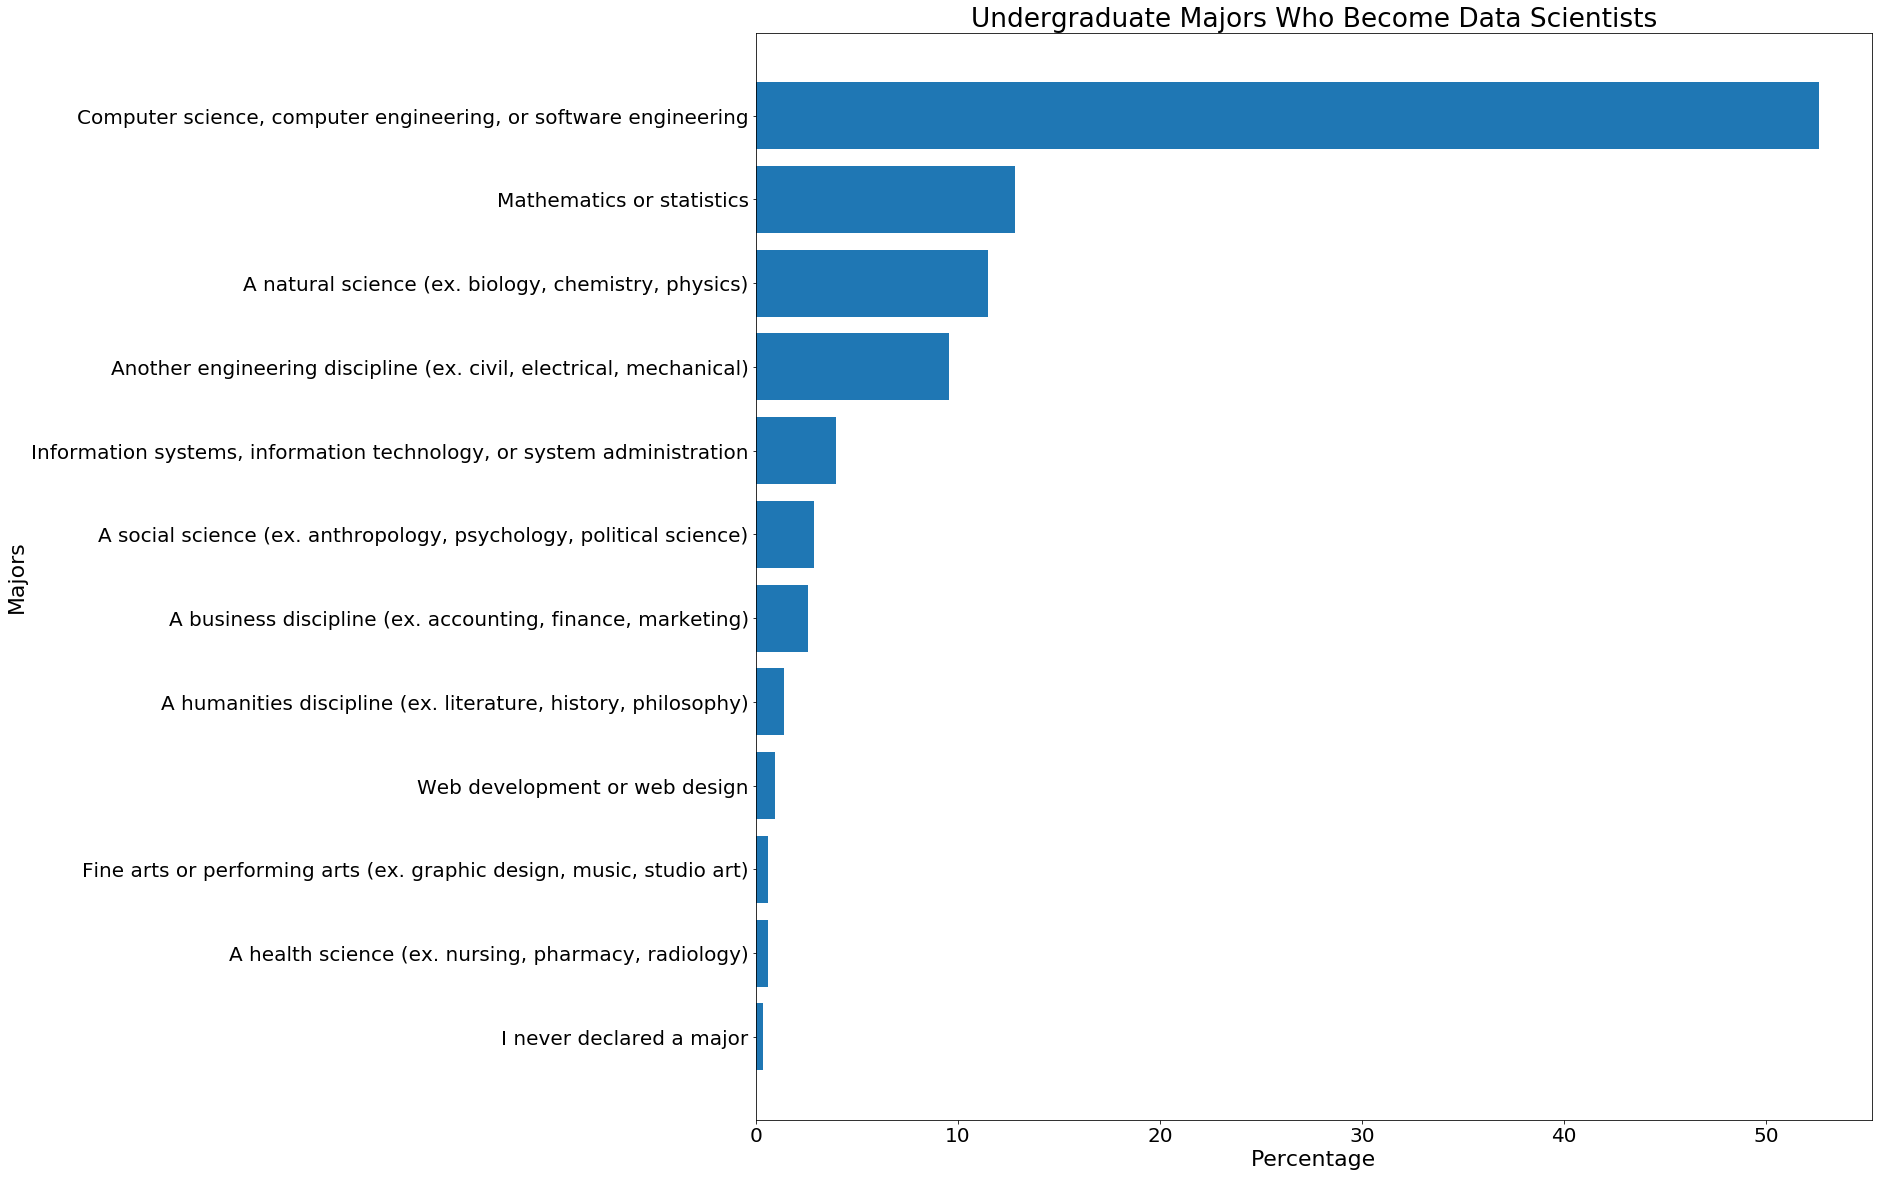

In [223]:
plt.figure(figsize=(20,20))
plt.barh(df.UndergradMajor.value_counts().index, (df.UndergradMajor.value_counts() / df.UndergradMajor.value_counts().sum())*100);
plt.gca().invert_yaxis()
plt.title('Undergraduate Majors Who Become Data Scientists')
plt.xlabel('Percentage')
plt.ylabel('Majors');

### Question #2: What programming languages should I focus on to become a data scientist?

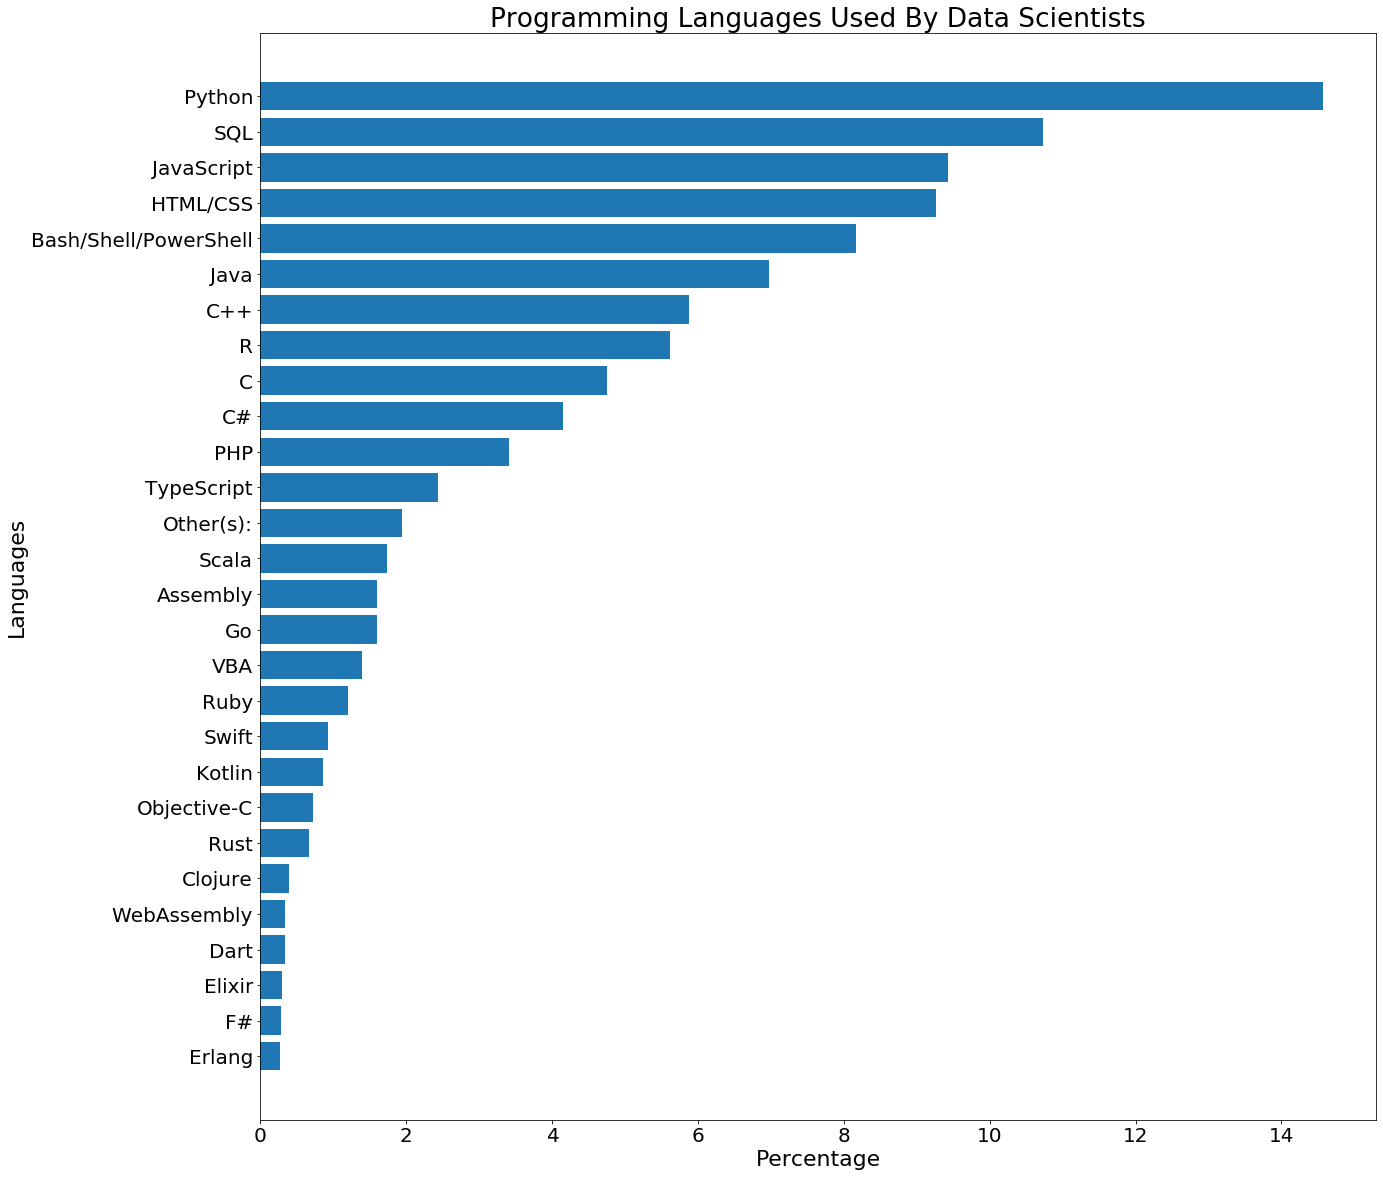

In [238]:
plt.figure(figsize=(20,20))
plt.barh(df_lang.programming_language, df_lang.percentage);
plt.gca().invert_yaxis()
plt.title('Programming Languages Used By Data Scientists')
plt.xlabel('Percentage')
plt.ylabel('Languages');

### Question #3: How should I learn the necessary programming languages?

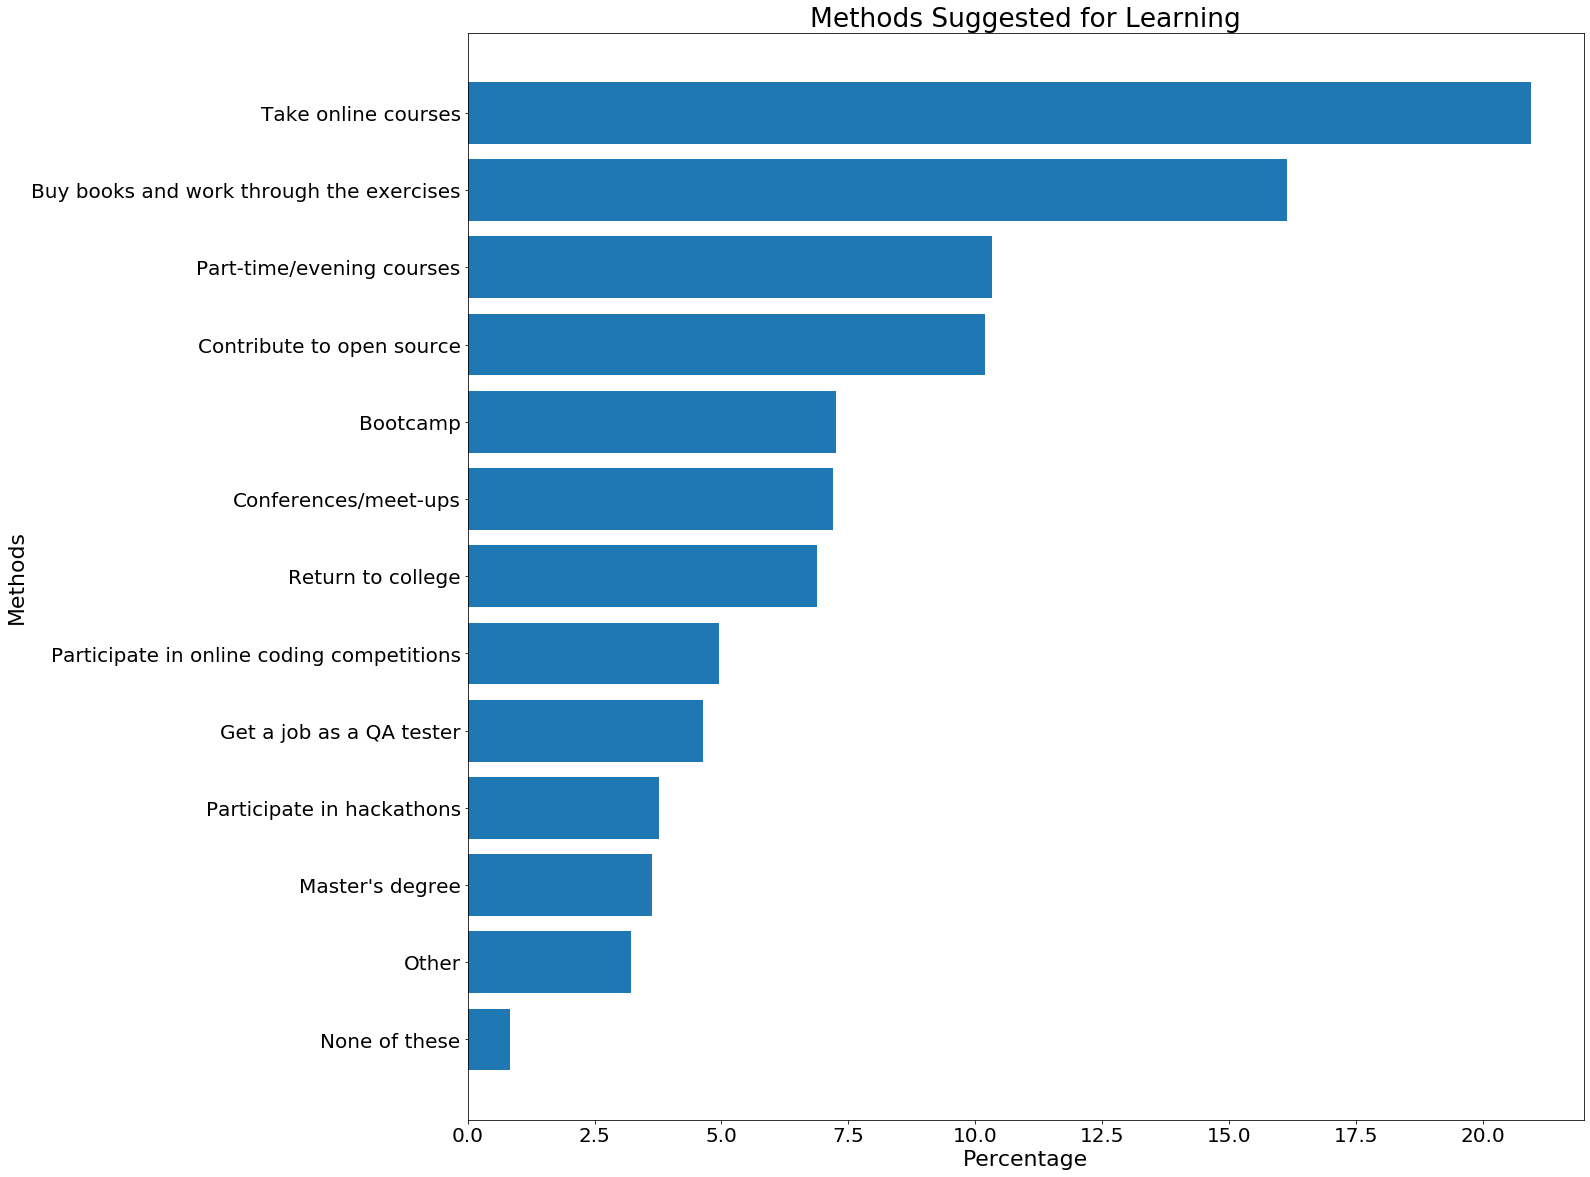

In [241]:
plt.figure(figsize=(20,20))
plt.barh(df_methods.methods, df_methods.percentage);
plt.gca().invert_yaxis()
plt.title('Methods Suggested for Learning')
plt.xlabel('Percentage')
plt.ylabel('Methods');

<a id='evaluate_the_results'></a>
## Evaluate Results

### Question #1: How common is becoming a data scientist or machine learning specialist with a physics background?

The data shows 11% of data scientist have a natural science degree such as physics. This means although It's not the majority it is common being the third highest degree proportionately

### Question #2: What programming languages should I focus on to become a data scientist?

Python and SQL make up 25% of the languages data scientist use at work. SQL gueries data and Python is used to analyze it and perform machine learning so this is confirms what you may have already thought.

### Question #3: How should I learn the necessary programming languages?

Approxiamley 89% of the responses do not suggest a traditional means of education such as college/university or university.